In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import sklearn
import sys
import tensorflow as tf
import time
import random
import pathlib
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


training_path = pathlib.Path('./lol_data_2/training')
validation_path = pathlib.Path('./lol_data_2/valid')
test_path = pathlib.Path('./lol_data_2/test')

train_image_paths = list(training_path.glob('*/*'))  
valid_image_paths = list(validation_path.glob('*/*'))  
test_image_paths = list(test_path.glob('*/'))  

train_image_paths = [str(path) for path in train_image_paths]
valid_image_paths = [str(path) for path in valid_image_paths]
test_image_paths = [str(path) for path in test_image_paths]

random.shuffle(train_image_paths)
random.shuffle(valid_image_paths)
random.shuffle(test_image_paths)

train_image_count = len(train_image_paths)
valid_image_count = len(valid_image_paths)
test_image_count = len(test_image_paths)

print("Training Images -> ", train_image_count)
print("Validation Images -> ", valid_image_count)
print("Test Images -> ", test_image_count)

2.1.0
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)
numpy 1.18.1
pandas 0.23.3
sklearn 0.21.3
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf
Training Images ->  151558
Validation Images ->  40401
Test Images ->  321


In [2]:
train_image_paths[:5]

['lol_data_2\\training\\Glacial_Shroud_item\\Glacial_Shroud_231.png',
 'lol_data_2\\training\\Trundle\\525.jpg',
 'lol_data_2\\training\\Malphite\\156.jpg',
 'lol_data_2\\training\\Tristana\\339.jpg',
 'lol_data_2\\training\\Kindred\\388.jpg']

In [3]:
valid_image_paths[:5]

['lol_data_2\\valid\\Leona\\84.jpg',
 'lol_data_2\\valid\\KogMaw\\122.jpg',
 "lol_data_2\\valid\\Targon's_Buckler_item\\Targon's_Buckler_283.png",
 'lol_data_2\\valid\\Aphelios\\35.jpg',
 'lol_data_2\\valid\\Wukong\\75.jpg']

In [4]:
test_image_paths[:5]

['lol_data_2\\test\\Zyra.jpg',
 'lol_data_2\\test\\Kayn.jpg',
 'lol_data_2\\test\\Hextech_Gunblade_item.png',
 'lol_data_2\\test\\B._F._Sword_item.png',
 'lol_data_2\\test\\Qiyana.jpg']

In [5]:
label_names = sorted(item.name for item in training_path.glob('*/') if item.is_dir())
label_names

['Aatrox',
 'Abyssal_Mask_item',
 'Adaptive_Helm_item',
 'Aegis_of_the_Legion_item',
 'Aether_Wisp_item',
 'Ahri',
 'Akali',
 'Alistar',
 'Amplifying_Tome_item',
 'Amumu',
 'Anivia',
 'Annie',
 'Aphelios',
 "Archangel's_Staff_item",
 'Ardent_Censer_item',
 'Ashe',
 "Athene's_Unholy_Grail_item",
 'AurelionSol',
 'Azir',
 'B._F._Sword_item',
 "Bami's_Cinder_item",
 "Banshee's_Veil_item",
 'Bard',
 "Berserker's_Greaves_item",
 'Bilgewater_Cutlass_item',
 'Blade_of_the_Ruined_King_item',
 'Blasting_Wand_item',
 'Blitzcrank',
 'Bloodrazor_item',
 'Boots_of_Mobility_item',
 'Boots_of_Speed_item',
 'Bramble_Vest_item',
 'Brand',
 'Braum',
 'Caitlyn',
 'Camille',
 'Cassiopeia',
 'Catalyst_of_Aeons_item',
 "Caulfield's_Warhammer_item",
 'Chain_Vest_item',
 'Chalice_of_Harmony_item',
 'Chogath',
 'Cloak_of_Agility_item',
 'Cloth_Armor_item',
 'Control_Ward_item',
 'Corki',
 'Corrupting_Potion_item',
 'Crystalline_Bracer_item',
 'Cull_item',
 'Dagger_item',
 'Darius',
 "Dead_Man's_Plate_item",
 "

In [6]:
training_image_labels = [pathlib.Path(path).parent.name for path in train_image_paths]
for image, label in zip(train_image_paths[:5], training_image_labels[:5]):
    print(image, ' --->  ', label)

lol_data_2\training\Glacial_Shroud_item\Glacial_Shroud_231.png  --->   Glacial_Shroud_item
lol_data_2\training\Trundle\525.jpg  --->   Trundle
lol_data_2\training\Malphite\156.jpg  --->   Malphite
lol_data_2\training\Tristana\339.jpg  --->   Tristana
lol_data_2\training\Kindred\388.jpg  --->   Kindred


In [7]:
train_labels_info = []
for image_path, label in zip(train_image_paths, training_image_labels):
    train_labels_info.append((image_path, label))

In [8]:
import pprint
pprint.pprint(train_labels_info[:5])

[('lol_data_2\\training\\Glacial_Shroud_item\\Glacial_Shroud_231.png',
  'Glacial_Shroud_item'),
 ('lol_data_2\\training\\Trundle\\525.jpg', 'Trundle'),
 ('lol_data_2\\training\\Malphite\\156.jpg', 'Malphite'),
 ('lol_data_2\\training\\Tristana\\339.jpg', 'Tristana'),
 ('lol_data_2\\training\\Kindred\\388.jpg', 'Kindred')]


In [9]:
valid_image_labels = [pathlib.Path(path).parent.name for path in valid_image_paths]
for image, label in zip(valid_image_paths[:5], valid_image_labels[:5]):
    print(image, ' --->  ', label)

lol_data_2\valid\Leona\84.jpg  --->   Leona
lol_data_2\valid\KogMaw\122.jpg  --->   KogMaw
lol_data_2\valid\Targon's_Buckler_item\Targon's_Buckler_283.png  --->   Targon's_Buckler_item
lol_data_2\valid\Aphelios\35.jpg  --->   Aphelios
lol_data_2\valid\Wukong\75.jpg  --->   Wukong


In [10]:
valid_labels_info = []
for image_path, label in zip(valid_image_paths, valid_image_labels):
    valid_labels_info.append((image_path, label))

In [11]:
pprint.pprint(valid_labels_info[:5])

[('lol_data_2\\valid\\Leona\\84.jpg', 'Leona'),
 ('lol_data_2\\valid\\KogMaw\\122.jpg', 'KogMaw'),
 ("lol_data_2\\valid\\Targon's_Buckler_item\\Targon's_Buckler_283.png",
  "Targon's_Buckler_item"),
 ('lol_data_2\\valid\\Aphelios\\35.jpg', 'Aphelios'),
 ('lol_data_2\\valid\\Wukong\\75.jpg', 'Wukong')]


In [12]:
test_image_labels = [path.split('\\')[2].split('.')[0] for path in test_image_paths]
for image, label in zip(test_image_paths[:5], test_image_labels[:5]):
    print(image, ' --->  ', label)

lol_data_2\test\Zyra.jpg  --->   Zyra
lol_data_2\test\Kayn.jpg  --->   Kayn
lol_data_2\test\Hextech_Gunblade_item.png  --->   Hextech_Gunblade_item
lol_data_2\test\B._F._Sword_item.png  --->   B
lol_data_2\test\Qiyana.jpg  --->   Qiyana


In [13]:
test_labels_info = []
for image_path, label in zip(test_image_paths, test_image_labels):
    test_labels_info.append((image_path, label))

In [14]:
train_df = pd.DataFrame(train_labels_info)
valid_df = pd.DataFrame(valid_labels_info)
test_df = pd.DataFrame(test_labels_info)

train_df.columns = valid_df.columns =test_df.columns = ['filepath', 'class']

print(train_df.head())
print(valid_df.head())
print(test_df.head())

filepath                class
0  lol_data_2\training\Glacial_Shroud_item\Glacia...  Glacial_Shroud_item
1                lol_data_2\training\Trundle\525.jpg              Trundle
2               lol_data_2\training\Malphite\156.jpg             Malphite
3               lol_data_2\training\Tristana\339.jpg             Tristana
4                lol_data_2\training\Kindred\388.jpg              Kindred
                                            filepath                  class
0                      lol_data_2\valid\Leona\84.jpg                  Leona
1                    lol_data_2\valid\KogMaw\122.jpg                 KogMaw
2  lol_data_2\valid\Targon's_Buckler_item\Targon'...  Targon's_Buckler_item
3                   lol_data_2\valid\Aphelios\35.jpg               Aphelios
4                     lol_data_2\valid\Wukong\75.jpg                 Wukong
                                    filepath                  class
0                   lol_data_2\test\Zyra.jpg                   Zyra
1       

In [15]:
height = 64
width = 64
channels = 3
batch_size = 128
num_classes = 308

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    #像素值 都除以255
    rescale = 1./255,
    # 图片随机旋转 (5度以内)
    rotation_range = 20,
    # 图片左右位移  20%限度以内
    width_shift_range = 0.2,
    # 图片上下位移  20%限度以内
    height_shift_range = 0.2,
    # 图像剪切强度
    shear_range = 0.2,
    # 图像缩放强度
    zoom_range = 0.2,
    # 是否水平翻转
    horizontal_flip = False,
    # 放大缩小吼， 像素填充方式
    fill_mode = 'nearest',
)

train_generator = train_datagen.flow_from_dataframe(train_df, directory = './',
                                                    x_col = 'filepath',
                                                    y_col = 'class',
                                                    classes = label_names,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 2333,
                                                    shuffle = True,
                                                    class_mode = "categorical")

valid_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
)
valid_generator = valid_datagen.flow_from_dataframe(valid_df, directory = './',
                                                    x_col = 'filepath',
                                                    y_col = 'class',
                                                    classes = label_names,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 666,
                                                    shuffle = True,
                                                    class_mode = "categorical")

test_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
)
test_generator = test_datagen.flow_from_dataframe(test_df, directory = './',
                                                    x_col = 'filepath',
                                                    y_col = 'class',
                                                    classes = label_names,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 9727,
                                                    shuffle = True,
                                                    class_mode = "categorical")

Found 151558 validated image filenames belonging to 308 classes.
Found 40401 validated image filenames belonging to 308 classes.
Found 305 validated image filenames belonging to 308 classes.


In [16]:
train_num = train_generator.samples
valid_num = valid_generator.samples
test_num = test_generator.samples

print("Training Generator Sample -> ", train_num)
print("Validation Generator Sample -> ", valid_num)
print("Test Generator Sample -> ", test_num)

Training Generator Sample ->  151558
Validation Generator Sample ->  40401
Test Generator Sample ->  305


In [17]:
for i in range(2):
    x, y = train_generator.next()
    print(x.shape, y.shape)
    print(y)

(128, 64, 64, 3) (128, 308)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(128, 64, 64, 3) (128, 308)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
model = keras.models.Sequential([
    
    keras.layers.Conv2D(filters=16, kernel_size = 3, padding='same',
                       activation = 'selu', input_shape = [width, height, channels]),
    keras.layers.Conv2D(filters=16, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=32, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.Conv2D(filters=32, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=64, kernel_size = 3, padding='same',
                       activation = 'selu', input_shape = [width, height, channels]),
    keras.layers.Conv2D(filters=64, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'selu'),
    keras.layers.AlphaDropout(rate=0.5),
    
    keras.layers.Dense(num_classes, activation = 'softmax')
])

model.compile(loss="categorical_crossentropy",
             optimizer = "adam", metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        1

In [19]:
logdir = './lol-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)

output_model_file = os.path.join(logdir, "face_recognition_model.h5")

callbacks = [
    keras.callbacks.ModelCheckpoint(output_model_file, monitor='loss', mode='min', verbose=0, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)
]

In [25]:
epochs = 20
#因为数据是generator 产生的 所以不能用fit函数
history = model.fit_generator(train_generator, steps_per_epoch=train_num // batch_size,
                             epochs=epochs, validation_data=valid_generator,
                             validation_steps=valid_num//batch_size,
                             callbacks = [
    keras.callbacks.ModelCheckpoint(output_model_file, monitor='loss', mode='min', verbose=0, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)
])

W0210 18:51:09.959116  9528 deprecation.py:323] From <ipython-input-25-9f7a7bc2e387>:8: Model.fit_generator (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
Please use Model.fit, which supports generators.
W0210 18:51:10.175538  9528 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']
W0210 18:51:10.252332  9528 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 1184 steps, validate for 315 steps
Epoch 1/20
1184/1184 [==============================] - 645s 545ms/step - loss: 1.5001 - accuracy: 0.6436 - val_loss: 0.0495 - val_accuracy: 0.9904
Epoch 2/20
1184/1184 [==============================] - 596s 503ms/step - loss: 0.3603 - accuracy: 0.8945 - val_loss: 0.0576 - val_accuracy: 0.9882
Epoch 3/20
1184/1184 [==============================] - 593s 501ms/step - loss: 0.2727 - accuracy: 0.9210 - val_loss: 0.2574 - val_accuracy: 0.9697

In [26]:
def plot_learning_curves(history, label, epochs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data['val_'+label] = history.history['val_' + label]
    
    pd.DataFrame(data).plot(figsize = (8,5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()

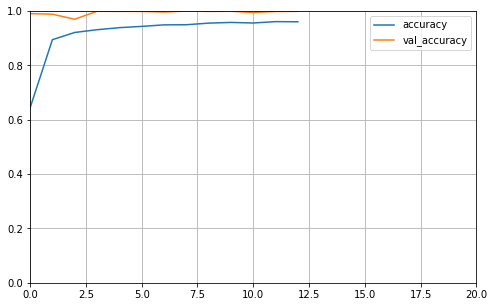

In [34]:
plot_learning_curves(history, 'accuracy', epochs, 0, 1)

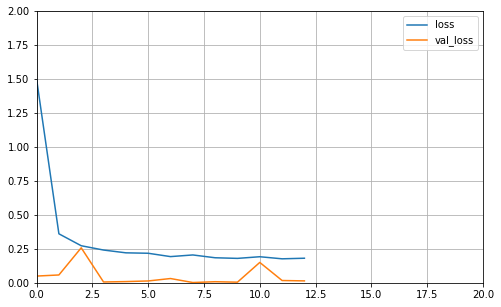

In [35]:
plot_learning_curves(history, 'loss', epochs, 0, 2)

In [36]:
import tensorflow as tf
def load_and_preprocess_single_img(path):
    # read the img through file path
    image = tf.io.read_file(path)  
    image = tf.image.decode_jpeg(image, channels=3)
    # 原始图片大小为(128, 128, 3)，重设为(64, 64)
    image = tf.image.resize(image, [64, 64])  
    image = tf.cast(image, tf.float32) / 255.0  # 归一化到[0,1]范围
    image = np.expand_dims(image, axis = 0) # since you have batch_size, so you need to expand your image
    return image

In [37]:
def evaluate_single_pic(path, show=False):
    
    if show:
        import matplotlib.image as mpimg
        plt.imshow(mpimg.imread(path))
    image = load_and_preprocess_single_img(path)
    predict_result = model.predict(image)
    print("This is", label_names[np.argmax(predict_result, axis=1)[0]])

This is Leona


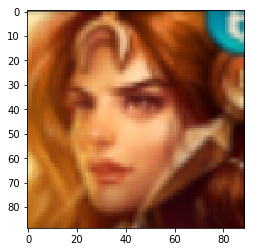

In [38]:
test_pic_path = "./lol_data_2/test_2/13.png"
evaluate_single_pic(test_pic_path, True)

This is Quicksilver_Sash_item


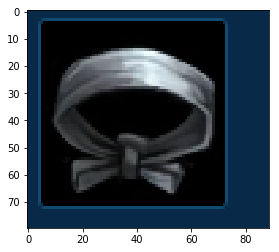

In [39]:
test_pic_path2 = "./lol_data_2/test_2/17.png"
evaluate_single_pic(test_pic_path2, True)

In [40]:
test_accuracy = model.evaluate(test_generator)
print(test_accuracy)

W0210 21:06:24.310644  9528 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']
3/3 [==============================] - 0s 136ms/step - loss: 0.0024 - accuracy: 0.9967
[0.0024270719538117547, 0.9967213]
